In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('train_ctrUa4K.csv')

In [3]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
obj = (train_data.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 8


In [7]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
train_data.drop(['Loan_ID'],axis=1,inplace=True)

In [9]:
train_data['LoanAmount'] = train_data['LoanAmount'].fillna(train_data['LoanAmount'].mean())

In [10]:
train_data['Credit_History'] = train_data['Credit_History'].fillna(train_data['Credit_History'].median())

In [11]:
train_data['Loan_Amount_Term'] = train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mean())

In [12]:
train_data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
train_data['Self_Employed'] = train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0])

In [14]:
train_data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
train_data['Loan_Status'].replace('Y',1,inplace = True)
train_data['Loan_Status'].replace('N',0,inplace = True)
train_data['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [16]:
train_data.Married=train_data.Married.map({'Yes':1,'No':0})
train_data['Married'].value_counts()

1.0    398
0.0    213
Name: Married, dtype: int64

In [17]:
train_data.Dependents=train_data.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
train_data['Dependents'].value_counts()

0.0    345
1.0    102
2.0    101
3.0     51
Name: Dependents, dtype: int64

In [18]:
train_data.Education=train_data.Education.map({'Graduate':1,'Not Graduate':0})
train_data['Education'].value_counts()

1    480
0    134
Name: Education, dtype: int64

In [19]:
train_data.Self_Employed=train_data.Self_Employed.map({'Yes':1,'No':0})
train_data['Self_Employed'].value_counts()

0    532
1     82
Name: Self_Employed, dtype: int64

In [20]:
train_data.Property_Area=train_data.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})
train_data['Property_Area'].value_counts()

1    233
2    202
0    179
Name: Property_Area, dtype: int64

In [21]:
train_data.Gender=train_data.Gender.map({'Male':1,'Female':0})
train_data['Gender'].value_counts()

1.0    489
0.0    112
Name: Gender, dtype: int64

In [22]:
train_data.dtypes

Gender               float64
Married              float64
Dependents           float64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

Text(0.5, 1.0, 'Correlation Matrix (for Loan Status)')

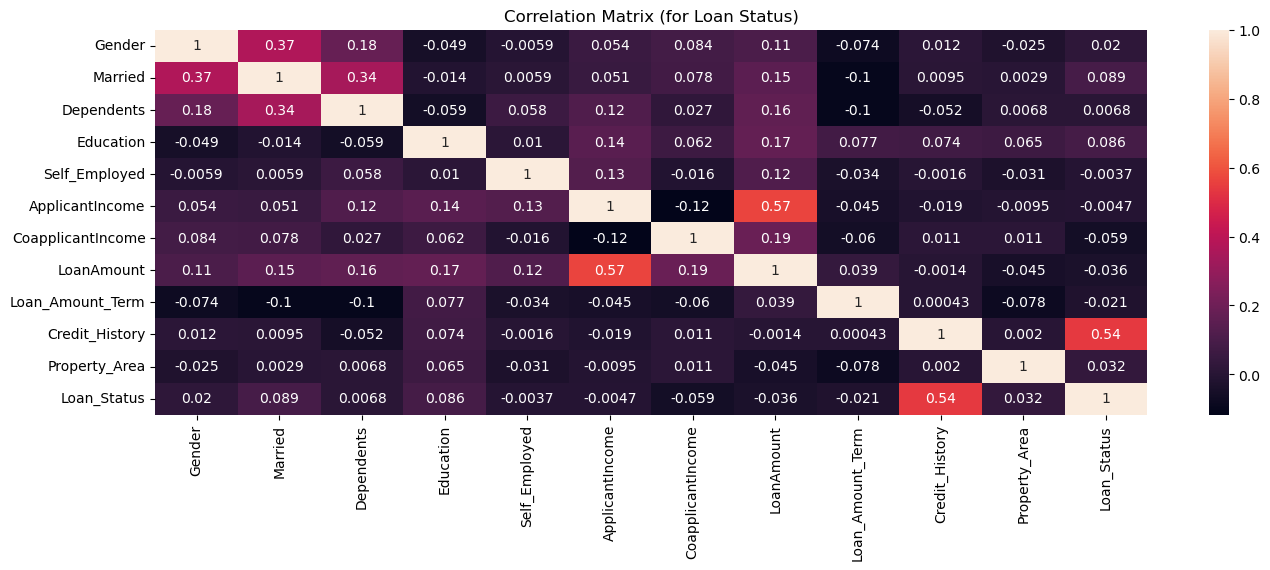

In [23]:
plt.figure(figsize=(16,5))
sns.heatmap(train_data.corr(),annot=True)
plt.title('Correlation Matrix (for Loan Status)')

In [24]:
x = train_data.drop(['Gender','Married','Dependents','Education','Property_Area','Loan_Status'], axis = 1)
y = train_data['Loan_Status']

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y ,test_size=0.2, random_state=42)

In [26]:
x_train

,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
83,0,6000,2250.0,265.000000,360.0,1.0
90,0,2958,2900.0,131.000000,360.0,1.0
227,0,6250,1695.0,210.000000,360.0,1.0
482,0,2083,3150.0,128.000000,360.0,1.0
464,0,4166,0.0,98.000000,360.0,0.0
...,...,...,...,...,...,...
71,1,1875,1875.0,97.000000,360.0,1.0
106,0,11417,1126.0,225.000000,360.0,1.0
270,0,3237,0.0,30.000000,360.0,1.0
435,0,10047,0.0,146.412162,240.0,1.0


In [27]:
x_test

,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
350,0,9083,0.0,228.0,360.0,1.0
377,0,4310,0.0,130.0,360.0,1.0
163,0,4167,1447.0,158.0,360.0,1.0
609,0,2900,0.0,71.0,360.0,1.0
132,0,2718,0.0,70.0,360.0,1.0
...,...,...,...,...,...,...
231,0,3716,0.0,42.0,180.0,1.0
312,0,2507,0.0,56.0,360.0,1.0
248,0,2882,1843.0,123.0,480.0,1.0
11,0,2500,1840.0,109.0,360.0,1.0


In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [29]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model = log_model.fit(x_train,y_train)

In [30]:
y_pred = log_model.predict(x_test)

In [31]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [32]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [33]:
confusion_matrix(y_test,y_pred)

array([[18, 25],
       [ 1, 79]], dtype=int64)

In [34]:
print('Accuracy = ', accuracy_score(y_test,y_pred))

Accuracy =  0.7886178861788617


In [35]:
test_data = pd.read_csv('test_lAUu6dG.csv')

In [36]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [37]:
test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [38]:
test_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [39]:
test_data['LoanAmount'] = test_data['LoanAmount'].fillna(test_data['LoanAmount'].mean())
test_data['Credit_History'] = test_data['Credit_History'].fillna(test_data['Credit_History'].median())
test_data['Loan_Amount_Term'] = test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].mean())
test_data['Self_Employed'] = test_data['Self_Employed'].fillna(test_data['Self_Employed'].mode()[0])

In [40]:
test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

In [41]:
test_data.Married=test_data.Married.map({'Yes':1,'No':0})
test_data['Married'].value_counts()

1    233
0    134
Name: Married, dtype: int64

In [42]:
test_data.Dependents=test_data.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
test_data['Dependents'].value_counts()

0.0    200
2.0     59
1.0     58
3.0     40
Name: Dependents, dtype: int64

In [43]:
test_data.Education=test_data.Education.map({'Graduate':1,'Not Graduate':0})
test_data['Education'].value_counts()

1    283
0     84
Name: Education, dtype: int64

In [44]:
test_data.Self_Employed=test_data.Self_Employed.map({'Yes':1,'No':0})
test_data['Self_Employed'].value_counts()

0    330
1     37
Name: Self_Employed, dtype: int64

In [45]:
test_data.Property_Area=test_data.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})
test_data['Property_Area'].value_counts()

2    140
1    116
0    111
Name: Property_Area, dtype: int64

In [46]:
test_data.Gender=test_data.Gender.map({'Male':1,'Female':0})
test_data['Gender'].value_counts()

1.0    286
0.0     70
Name: Gender, dtype: int64

In [47]:
test_data.dtypes

Loan_ID               object
Gender               float64
Married                int64
Dependents           float64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
dtype: object

In [48]:
test_data['Loan_ID']

0      LP001015
1      LP001022
2      LP001031
3      LP001035
4      LP001051
         ...   
362    LP002971
363    LP002975
364    LP002980
365    LP002986
366    LP002989
Name: Loan_ID, Length: 367, dtype: object

In [49]:
test1_data= test_data.drop(['Loan_ID','Gender','Married','Dependents','Education','Property_Area'], axis = 1)

In [50]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
test1_data = sc.fit_transform(test1_data)

In [51]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model = log_model.fit(x_train,y_train)

In [52]:
y_pred1 = log_model.predict(test1_data)

In [53]:
y_pred1

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [54]:
y_test

350    1
377    1
163    1
609    1
132    1
      ..
231    1
312    1
248    1
11     1
333    1
Name: Loan_Status, Length: 123, dtype: int64

In [55]:
train_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1.0,1.0,1.0,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1.0,1.0,0.0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1.0,1.0,0.0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1.0,0.0,0.0,1,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,1,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1.0,1.0,3.0,1,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1.0,1.0,1.0,1,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1.0,1.0,2.0,1,0,7583,0.0,187.000000,360.0,1.0,2,1


In [56]:
train_data['Loan_Status'] = pd.Series(y_pred1)

In [57]:
train_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1,0,5849,0.0,146.412162,360.0,1.0,2,1.0
1,1.0,1.0,1.0,1,0,4583,1508.0,128.000000,360.0,1.0,0,1.0
2,1.0,1.0,0.0,1,1,3000,0.0,66.000000,360.0,1.0,2,1.0
3,1.0,1.0,0.0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1.0
4,1.0,0.0,0.0,1,0,6000,0.0,141.000000,360.0,1.0,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,1,0,2900,0.0,71.000000,360.0,1.0,0,NaN
610,1.0,1.0,3.0,1,0,4106,0.0,40.000000,180.0,1.0,0,NaN
611,1.0,1.0,1.0,1,0,8072,240.0,253.000000,360.0,1.0,2,NaN
612,1.0,1.0,2.0,1,0,7583,0.0,187.000000,360.0,1.0,2,NaN


In [58]:
train_data.isna().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          247
dtype: int64

In [59]:
train_data.to_csv('LogReg.csv')

In [60]:
test_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1.0,1,0.0,1,0,5720,0,110.0,360.0,1.0,2
1,LP001022,1.0,1,1.0,1,0,3076,1500,126.0,360.0,1.0,2
2,LP001031,1.0,1,2.0,1,0,5000,1800,208.0,360.0,1.0,2
3,LP001035,1.0,1,2.0,1,0,2340,2546,100.0,360.0,1.0,2
4,LP001051,1.0,0,0.0,0,0,3276,0,78.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,1.0,1,3.0,0,1,4009,1777,113.0,360.0,1.0,2
363,LP002975,1.0,1,0.0,1,0,4158,709,115.0,360.0,1.0,2
364,LP002980,1.0,0,0.0,1,0,3250,1993,126.0,360.0,1.0,1
365,LP002986,1.0,1,0.0,1,0,5000,2393,158.0,360.0,1.0,0


In [61]:
test_data['Loan_Status'] = pd.Series(y_pred1)

In [62]:
test_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,1.0,1,0.0,1,0,5720,0,110.0,360.0,1.0,2,1
1,LP001022,1.0,1,1.0,1,0,3076,1500,126.0,360.0,1.0,2,1
2,LP001031,1.0,1,2.0,1,0,5000,1800,208.0,360.0,1.0,2,1
3,LP001035,1.0,1,2.0,1,0,2340,2546,100.0,360.0,1.0,2,1
4,LP001051,1.0,0,0.0,0,0,3276,0,78.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,1.0,1,3.0,0,1,4009,1777,113.0,360.0,1.0,2,1
363,LP002975,1.0,1,0.0,1,0,4158,709,115.0,360.0,1.0,2,1
364,LP002980,1.0,0,0.0,1,0,3250,1993,126.0,360.0,1.0,1,1
365,LP002986,1.0,1,0.0,1,0,5000,2393,158.0,360.0,1.0,0,1


In [64]:
test_data.Loan_Status = test_data.Loan_Status.map({1:'Y', 0:'N'})
test_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,1.0,1,0.0,1,0,5720,0,110.0,360.0,1.0,2,Y
1,LP001022,1.0,1,1.0,1,0,3076,1500,126.0,360.0,1.0,2,Y
2,LP001031,1.0,1,2.0,1,0,5000,1800,208.0,360.0,1.0,2,Y
3,LP001035,1.0,1,2.0,1,0,2340,2546,100.0,360.0,1.0,2,Y
4,LP001051,1.0,0,0.0,0,0,3276,0,78.0,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,1.0,1,3.0,0,1,4009,1777,113.0,360.0,1.0,2,Y
363,LP002975,1.0,1,0.0,1,0,4158,709,115.0,360.0,1.0,2,Y
364,LP002980,1.0,0,0.0,1,0,3250,1993,126.0,360.0,1.0,1,Y
365,LP002986,1.0,1,0.0,1,0,5000,2393,158.0,360.0,1.0,0,Y


In [66]:
test_data.to_csv('LOG_REG.csv')